<a href="https://colab.research.google.com/github/salmansrizon/Python_Examples/blob/master/New_Order_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# File uploading 
from google.colab import files 
uploaded = files.upload()

Saving Data_1.csv to Data_1.csv


In [6]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Load and Displaying Data 
data = pd.read_csv("Data_1.csv")
data.dropna()
data.head(5)

,BUYER_ID,TOTAL_ORDER,Avg_order_frequency,Organic_order_pct,Ass_order_Pct,Order_cancel_rate,BS_,AIV,LAST_VISIT,Session_per_visit_ratio,TOTAL_STAY_TIME_HH,AVG_VISIT_PER_DAY
0,915.0,6,83,0.666667,0.333333,0.666667,1.17,9.26,122,1.434783,17.44,1.43
1,941.0,23,413,0.391304,0.652174,0.826087,1.35,12.15,164,1.041667,101.25,1.04
2,1278.0,3,40,0.000000,1.000000,0.333333,1.67,39.90,2,2.820312,215.84,2.82
3,1429.0,41,261,0.658537,0.365854,0.365854,1.15,4.11,54,2.187135,1221.89,2.19
4,1596.0,24,1204,0.250000,0.750000,0.416667,2.08,4.48,4,1.309278,814.27,1.31


In [8]:
# Unique No 
data.nunique()

BUYER_ID                   3213
TOTAL_ORDER                 188
Avg_order_frequency        1865
Organic_order_pct           821
Ass_order_Pct               800
Order_cancel_rate           795
BS_                         373
AIV                        2478
LAST_VISIT                  828
Session_per_visit_ratio    3357
TOTAL_STAY_TIME_HH         6307
AVG_VISIT_PER_DAY           468
dtype: int64

In [9]:
# Null value count 
data.isnull().sum()

BUYER_ID                   0
TOTAL_ORDER                0
Avg_order_frequency        0
Organic_order_pct          0
Ass_order_Pct              0
Order_cancel_rate          0
BS_                        0
AIV                        0
LAST_VISIT                 0
Session_per_visit_ratio    0
TOTAL_STAY_TIME_HH         0
AVG_VISIT_PER_DAY          0
dtype: int64

In [10]:
data.describe()

,BUYER_ID,TOTAL_ORDER,Avg_order_frequency,Organic_order_pct,Ass_order_Pct,Order_cancel_rate,BS_,AIV,LAST_VISIT,Session_per_visit_ratio,TOTAL_STAY_TIME_HH,AVG_VISIT_PER_DAY
count,7.771000e+03,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7.771000e+03,7771.000000
mean,4.106683e+11,17.622571,600.664908,0.273051,0.741168,0.423804,1.517208,23.834199,245.684725,2.022996,2.715479e+03,2.023097
std,3.447236e+11,75.320692,1080.072264,0.277831,0.275046,0.238570,1.083055,221.558472,264.117258,0.925306,7.484639e+04,0.925329
min,9.150000e+02,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,2.000000,0.500000,1.000000e-02,0.500000
25%,1.388741e+06,4.000000,0.000000,0.000000,0.565942,0.250000,1.000000,3.630000,13.000000,1.477936,1.240000e+01,1.480000
50%,7.000000e+11,8.000000,117.000000,0.200000,0.814286,0.444444,1.110000,5.760000,128.000000,1.801242,6.460000e+01,1.800000
75%,7.000000e+11,18.000000,766.500000,0.469669,1.000000,0.600000,1.570000,10.670000,443.000000,2.287279,3.694050e+02,2.290000
max,7.000000e+11,6096.000000,10002.000000,1.000000,1.000000,1.000000,22.570000,12422.060000,847.000000,12.087282,6.317414e+06,12.090000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


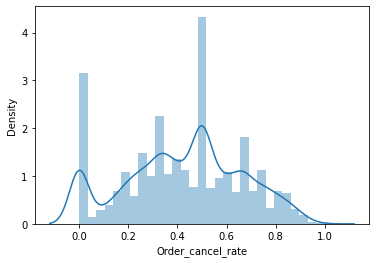

In [28]:
sns.distplot(data['Order_cancel_rate']);
# coloum = data['TOTAL_ORDER']
# max_value = data.idxmax()
# max_value

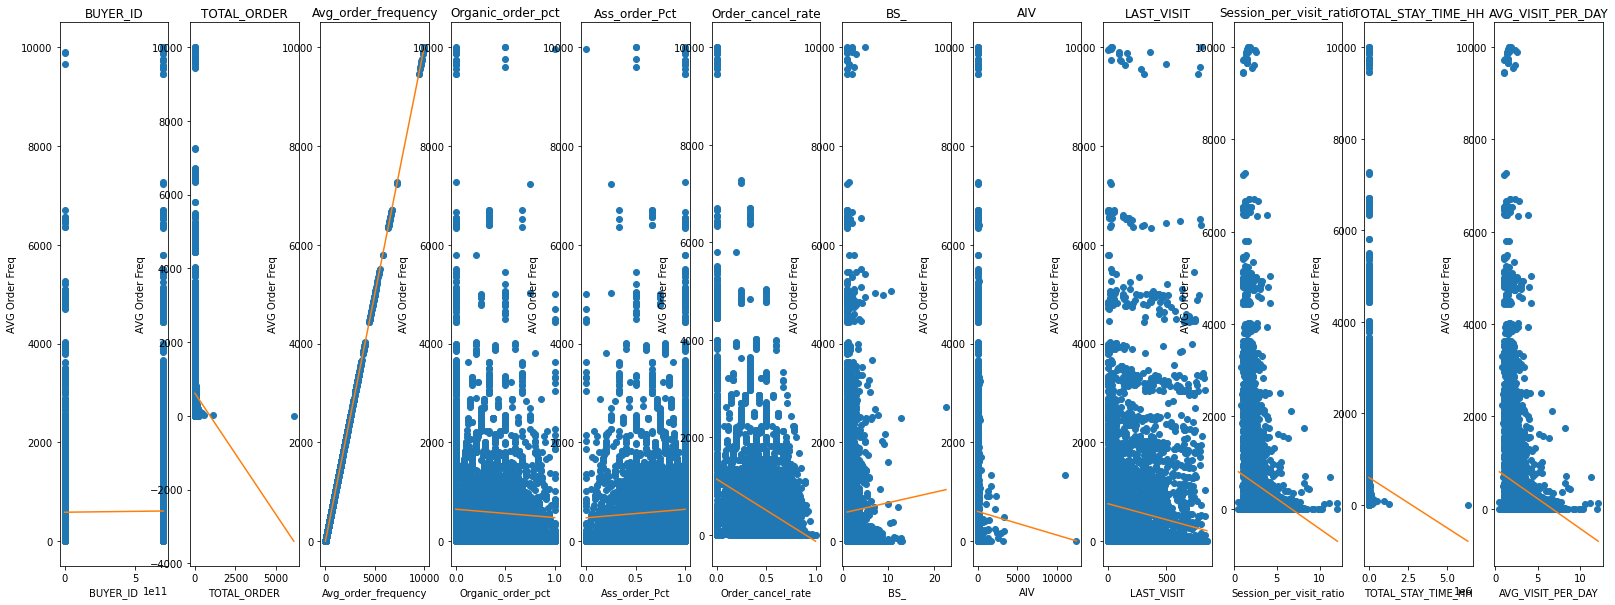

In [32]:
plt.figure(figsize=(30, 10))
# i: index
for i, col in enumerate(data.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 13, i+1)
    x = data[col]
    y = data['Avg_order_frequency']
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('AVG Order Freq')

**Co relations Between Parameters**

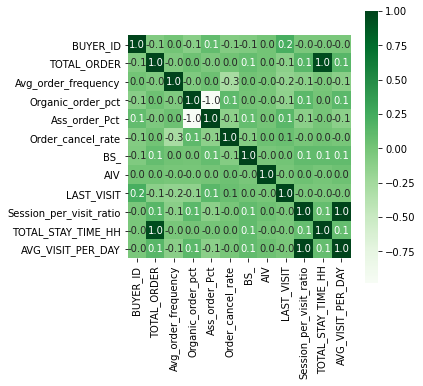

In [149]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape
# Plotting the heatmap of correlation between features
plt.figure(figsize=(5,5))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [487]:
# Normalizing Data 
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,BUYER_ID,TOTAL_ORDER,Avg_order_frequency,Organic_order_pct,Ass_order_Pct,Order_cancel_rate,BS_,AIV,LAST_VISIT,Session_per_visit_ratio,TOTAL_STAY_TIME_HH,AVG_VISIT_PER_DAY
0,0.000000e+00,0.000656,0.008298,0.666667,0.333333,0.666667,0.007881,0.000745,0.142012,0.080673,0.000003,0.080242
1,3.714286e-11,0.003446,0.041292,0.391304,0.652174,0.826087,0.016226,0.000977,0.191716,0.046747,0.000016,0.046592
2,5.185714e-10,0.000164,0.003999,0.000000,1.000000,0.333333,0.031062,0.003211,0.000000,0.200246,0.000034,0.200173
3,7.342857e-10,0.006400,0.026095,0.658537,0.365854,0.365854,0.006954,0.000330,0.061538,0.145602,0.000193,0.145815
4,9.728571e-10,0.003610,0.120376,0.250000,0.750000,0.416667,0.050070,0.000360,0.002367,0.069842,0.000129,0.069888


In [488]:
scaled_df.drop(['Session_per_visit_ratio','TOTAL_STAY_TIME_HH','AVG_VISIT_PER_DAY','Organic_order_pct','Ass_order_Pct'] ,axis= 1, inplace= True)
scaled_df.head()

,BUYER_ID,TOTAL_ORDER,Avg_order_frequency,Order_cancel_rate,BS_,AIV,LAST_VISIT
0,0.000000e+00,0.000656,0.008298,0.666667,0.007881,0.000745,0.142012
1,3.714286e-11,0.003446,0.041292,0.826087,0.016226,0.000977,0.191716
2,5.185714e-10,0.000164,0.003999,0.333333,0.031062,0.003211,0.000000
3,7.342857e-10,0.006400,0.026095,0.365854,0.006954,0.000330,0.061538
4,9.728571e-10,0.003610,0.120376,0.416667,0.050070,0.000360,0.002367


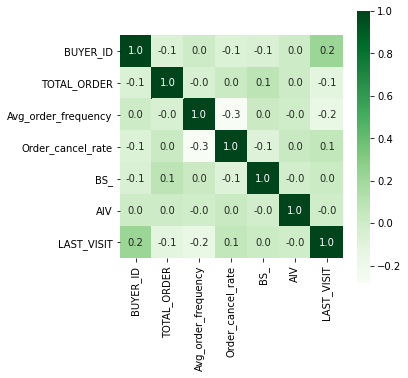

In [490]:
# Finding out the correlation between the features
corr = scaled_df.corr()
corr.shape
# Plotting the heatmap of correlation between features
plt.figure(figsize=(5,5))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [491]:
# Spliting target variable and independent variables
X = scaled_df.drop(['Avg_order_frequency'], axis = 1)
y = scaled_df['Avg_order_frequency']

In [492]:
X.columns

Index(['BUYER_ID', 'TOTAL_ORDER', 'Order_cancel_rate', 'BS_', 'AIV',
       'LAST_VISIT'],
      dtype='object')

[0.06655363 0.14051311 0.1249439  0.12046389 0.25653605 0.29098942]


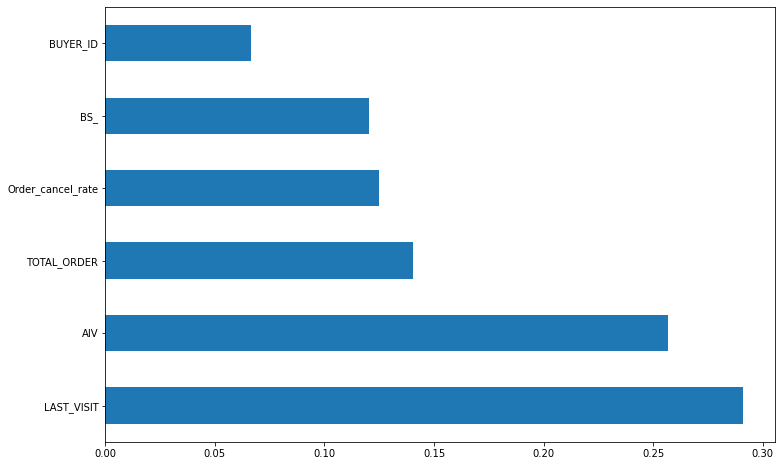

In [518]:
# Feature Importnce
from sklearn.ensemble import ExtraTreesRegressor

Selection  = ExtraTreesRegressor()
Selection.fit(X,y)

print(Selection.feature_importances_)

plt.figure(figsize=(12,8))
feat_importance = pd.Series(Selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

**Linear Regration**

In [519]:
#spliting The dataset into test & training set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.35, random_state = 5)

In [520]:
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [521]:
lm.intercept_

0.12161908099524783

In [522]:
# Feature Importance
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,BUYER_ID,0.00391676
1,TOTAL_ORDER,-0.356282
2,Order_cancel_rate,-0.117065
3,BS_,0.0452778
4,AIV,-0.0062966
5,LAST_VISIT,-0.0522578


In [523]:
# Model Evaluation with train Data 
# Model prediction on train data
y_pred = lm.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.09874036045362311
Adjusted R^2: 0.09766828316629594
MAE: 0.06335980991634901
MSE: 0.010480917005728783
RMSE: 0.10237634983593029


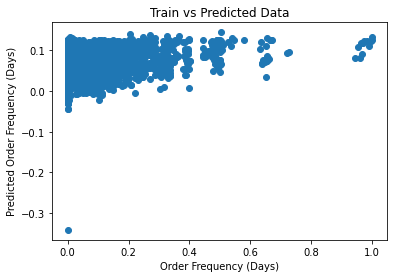

In [524]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Order Frequency (Days)")
plt.ylabel("Predicted Order Frequency (Days)")
plt.title("Train vs Predicted Data")
plt.show()

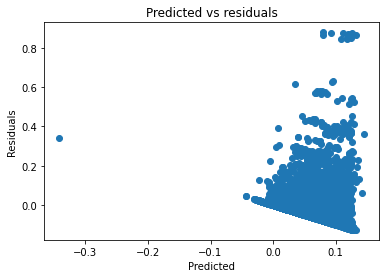

In [525]:
# Checking residuals
plt.scatter(y_pred,y_train - y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [526]:
# Model Evaluation with test Data 
# Model prediction on train data
y_test_pred = lm.predict(X_test)

# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:',acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.10757130510030222
Adjusted R^2: 0.10559763308799175
MAE: 0.06321536296252823
MSE: 0.010453996729888776
RMSE: 0.10224478827739229


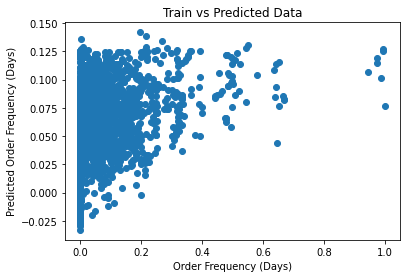

In [527]:
# Visualizing the differences between actual prices and predicted values with test data
plt.scatter(y_test, y_test_pred)
plt.xlabel("Order Frequency (Days)")
plt.ylabel("Predicted Order Frequency (Days)")
plt.title("Train vs Predicted Data")
plt.show()

**Random Forest Regressor**

In [528]:
#model Training
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [529]:
# Model Evaluation with train Data 
# Model prediction on train data
y_pred = reg.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8735908131844803
Adjusted R^2: 0.873440445396833
MAE: 0.02043579161112842
MSE: 0.0014700360890918945
RMSE: 0.038341049660799514


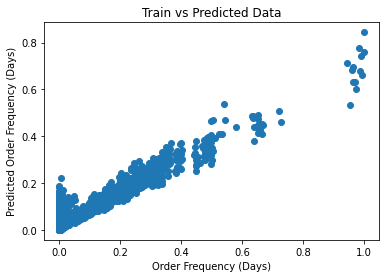

In [530]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Order Frequency (Days)")
plt.ylabel("Predicted Order Frequency (Days)")
plt.title("Train vs Predicted Data")
plt.show()

In [531]:
# Model Evaluation with test Data 
# Model prediction on train data
y_test_pred = reg.predict(X_test)

# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:',acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.11400640701355369
Adjusted R^2: 0.11204696670470049
MAE: 0.05505184661128632
MSE: 0.010378615318755204
RMSE: 0.10187548929332906


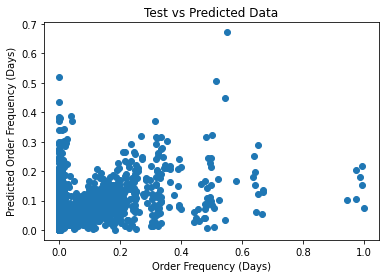

In [532]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Order Frequency (Days)")
plt.ylabel("Predicted Order Frequency (Days)")
plt.title("Test vs Predicted Data")
plt.show()

**XGBoost Regressor**

In [533]:
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xreg = XGBRegressor()

# Train the model using the training sets 
xreg.fit(X_train, y_train)

[12:28:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [534]:
# Model Evaluation with train Data 
# Model prediction on train data
y_pred = xreg.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.2748509472724483
Adjusted R^2: 0.2739883591843505
MAE: 0.053096655770306395
MSE: 0.008432894035114753
RMSE: 0.09183079023461985


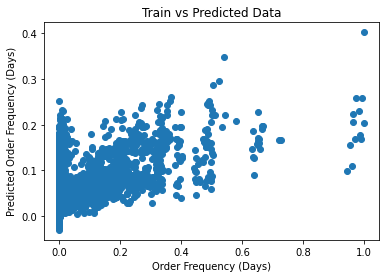

In [535]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Order Frequency (Days)")
plt.ylabel("Predicted Order Frequency (Days)")
plt.title("Train vs Predicted Data")
plt.show()

In [536]:
# Model Evaluation with test Data 
# Model prediction on train data
y_test_pred = xreg.predict(X_test)

# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:',acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.1908198667756087
Adjusted R^2: 0.18903030510979735
MAE: 0.05585893513993561
MSE: 0.009478814962992082
RMSE: 0.09735920584614524


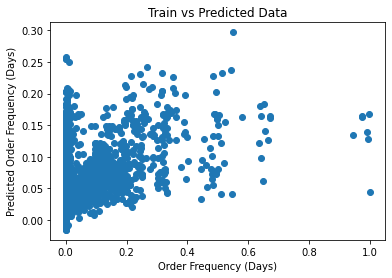

In [537]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Order Frequency (Days)")
plt.ylabel("Predicted Order Frequency (Days)")
plt.title("Train vs Predicted Data")
plt.show()

**SVM Regressor**

In [538]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
sreg = svm.SVR()
# Train the model using the training sets 
sreg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [539]:
# Model Evaluation with train Data 
# Model prediction on train data
y_pred = sreg.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: -0.07904784307761115
Adjusted R^2: -0.08033140514312787
MAE: 0.08642576733504037
MSE: 0.012548449295032633
RMSE: 0.11201986116324476


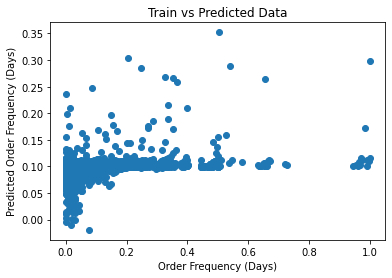

In [540]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Order Frequency (Days)")
plt.ylabel("Predicted Order Frequency (Days)")
plt.title("Train vs Predicted Data")
plt.show()

In [541]:
# Model Evaluation with test Data 
# Model prediction on train data
y_test_pred = sreg.predict(X_test)

# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:',acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.08372950144884594
Adjusted R^2: -0.08612624933262514
MAE: 0.08645124148579375
MSE: 0.012694913026640808
RMSE: 0.11267170464069853


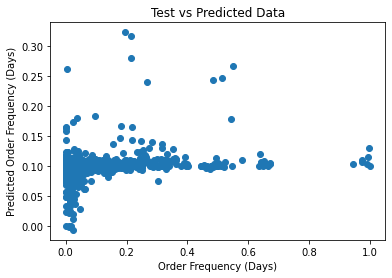

In [542]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred )
plt.xlabel("Order Frequency (Days)")
plt.ylabel("Predicted Order Frequency (Days)")
plt.title("Test vs Predicted Data")
plt.show()

In [543]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,19.081987
1,Random Forest,11.400641
0,Linear Regression,10.757131
3,Support Vector Machines,-8.372950
